# Maximum Likelihood Estimation

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import random
import os

from IPython.display import display, Math, Latex, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Log-likelihood
Assuming N Random Variables\
$\log L(x;\theta) = \sum_{i=1}^{N} \log f_X(x_i;\theta)$
---

### Binomial Distribution
$f_x(x,p) = {m \choose x}p^x (1-p)^{m-x}$ \
$\mu = mp$ \
$\sigma^2 = mp(1-p)$

**Parameters:**
1. $x_i$ is a Discrete Random Number between $[0,m]$
2. $p^* = \frac{1}{N*m} \sum_{i=1}^{N}x_i$
3. $\mu^* = mp$
4. $\sigma^{2^{*}} = mp(1-p)$
---

### Poisson Distribution
$f_x(\lambda,x) = \frac{\lambda^x e^{-\lambda}}{x!}$ \
$\mu = \lambda$ \
$\sigma^2 = \lambda$

**Parameters:**
1. $x_i$ is a Discrete Random Number between $[0,\infty)$
2. $\lambda^{*} = \frac{1}{N} \sum_{i=1}^{N}x_i$
3. $\mu^* = \lambda$
4. $\sigma^{2^{*}} = \lambda$
---

### Exponential Distribution
$f_x(x,\lambda) = \lambda e^{-\lambda x}$ \
$\mu = \frac{1}{\lambda}$ \
$\sigma^2 = \frac{1}{\lambda^2}$

**Parameters:**
1. $x_i$ is a Continous Random Number between $[0,\infty)$
2. $\lambda^{*} = \frac{N}{\sum_{i=1}^{N}x_i}$
3. $\mu^{*} = \frac{1}{\lambda^*}$
4. $\sigma^{2^{*}} = \frac{1}{\lambda^{*^{2}}}$
---

### Gaussian Distribution
$f_x(x,\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{(x-\mu)^2/{2\sigma^2}}$ \
$\mu = \mu$ \
$\sigma^2 = \sigma^2$

**Parameters:**
1. $x_i$ is a Continous Random Number between $(-\infty,\infty)$
2. $\mu^* = \frac{1}{N} \sum_{i=1}^{N}x_i$
3. $\sigma^{2^{*}} = \frac{1}{N} \sum_{i=1}^{N}(x_i-\mu^*)^2$
---

### Laplacian Distribution
$f_x(x,\mu,b) = \frac{1}{2b}e^{-|x-\mu|/b}$ \
$\mu = \mu$ \
$\sigma^2 = 2b^2$

**Parameters:**
1. $x_i$ is a Continous Random Number between $(-\infty,\infty)$
2. $\sum_{i=1}^{N} sgn(x_i - \mu) = 0$. This solves to $\mu^* = Median(x_1,x_2,x_3,...x_N)$
3. $b^* = \frac{1}{N} \sum_{i=1}^{N}|x_i - \mu^*|$
4. $\sigma^{2^{*}} = 2{b^{*}}^{2}$

---

**X: Input Data \
Y: Estimated Data \
TrueParameters: Parameters for Input Distribution\
EstimatedParameters: Estimated Parameters of Input Distribution**

In [2]:
class MLE():
    def __init__(self):
        self.N = None
        self.Distribution = None
        self.TrueParameters = None
        self.X = None
        self.EstimatedParameters = None
        self.Y = None
    
    def GenerateData(self,Parameters):
        # Generates Data with given Parameters for a Distribution
        Data = []
        if self.Distribution == 'Binomial':
            m = Parameters[0]
            p = Parameters[1]
            Data = np.random.binomial(m,p,self.N)
            
        elif self.Distribution == 'Poisson':
            lam = Parameters[0]
            Data = np.random.poisson(lam,self.N)
            
        elif self.Distribution == 'Exponential':
            lam = Parameters[0]
            Data = np.random.exponential(1.0/lam,self.N)
            
        elif self.Distribution == 'Gaussian':
            mu = Parameters[0]
            Var = Parameters[1]
            Data = np.random.normal(mu, np.sqrt(Var), self.N)
        
        elif self.Distribution == 'Laplacian':
            mu = Parameters[0]
            b = Parameters[1]
            Data = np.random.laplace(mu, b, self.N)
            
        return Data
        
    def fit(self,N,Distribution,TrueParameters):
        # Initializes: Generates Data with gives Parameters and Estimates Parameters from Generated Data
        # Generating Data from Estimated Parameters
        self.TrueParameters = TrueParameters
        self.Distribution = Distribution
        self.N = N
        self.X = self.GenerateData(TrueParameters)
        self.EstimateParameters()
        self.Y = self.GenerateData(self.EstimatedParameters)
        
        print ("N: %-*s  True-Parameters: %-*s  Estimated-Parameters: %s" % (4,self.N,8,tuple(self.TrueParameters),tuple(self.EstimatedParameters)))
         
    def EstimateParameters(self):
        # Estimates Parameters from Generated Data
        Parameters = []
        
        if self.Distribution == 'Binomial':
            # 'm' is not a Estimated Parameter. It will be provided
            m = self.TrueParameters[0]
            p = np.sum(self.X)/(m*self.N)
            Parameters = [m,p]
            
        elif self.Distribution == 'Poisson':
            lam = np.sum(self.X)/(self.N)
            Parameters = [lam]
            
        elif self.Distribution == 'Exponential':
            lam = (self.N)/np.sum(self.X)
            Parameters = [lam]
            
        elif self.Distribution == 'Gaussian':
            mu = np.sum(self.X)/(self.N)
            Var = np.sum(np.square(self.X - mu))/(self.N)
            Parameters = [mu,Var]
        
        elif self.Distribution == 'Laplacian':
            mu = np.median(self.X)
            b = np.sum(np.abs(self.X - mu))/(self.N)
            Parameters = [mu,b]
            
        self.EstimatedParameters = Parameters
            
    def PlotData(self):
        # Plots Data using True Parameters and Estimated Parameters
        plt.figure(figsize=(14,6))
        plt.hist(self.X,color='red',label='Data from True Parameters')
        plt.hist(self.Y,color='blue',label='Data from Estimated Parameters')
        plt.title(self.Distribution + " Distribution")
        plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)
        plt.grid()
        plt.show()
        
        plt.figure(figsize=(14,6))
        
        plt.subplot(1,2,1)
        plt.hist(self.X,color='red',label='Data from True Parameters')
        plt.title("Data from True Parameters")
        plt.grid()
        
        plt.subplot(1,2,2)
        plt.hist(self.Y,color='blue',label='Data from Estimated Parameters')
        plt.title("Data from Estimated Parameters")
        plt.grid()
        
        plt.show()

### Binomial Distribution

N: 500   True-Parameters: (10, 0.5)  Estimated-Parameters: (10, 0.5072)


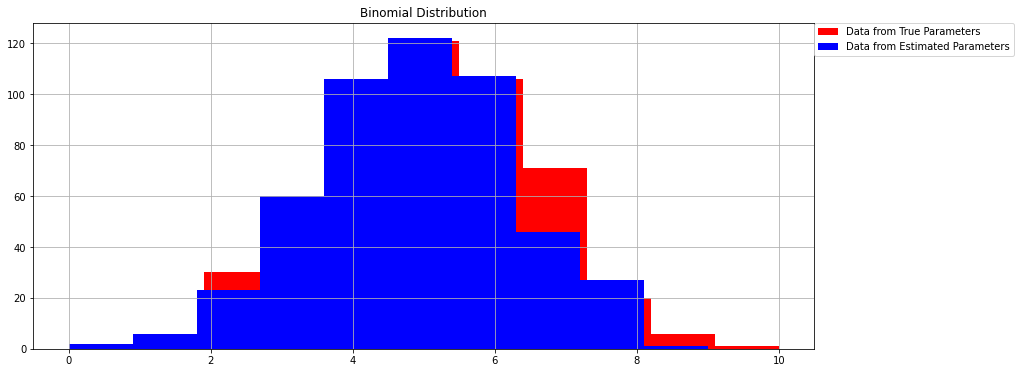

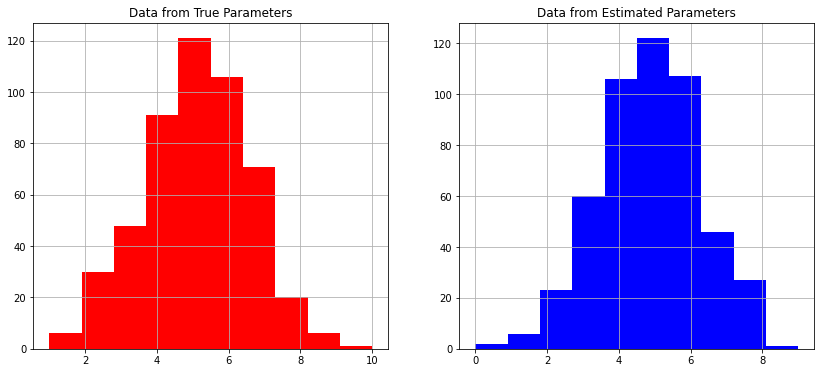


--------------------

N: 1000  True-Parameters: (10, 0.5)  Estimated-Parameters: (10, 0.4991)


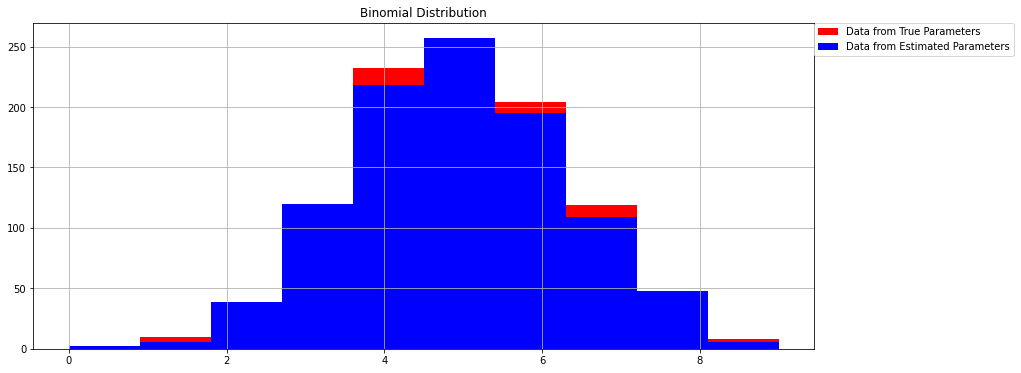

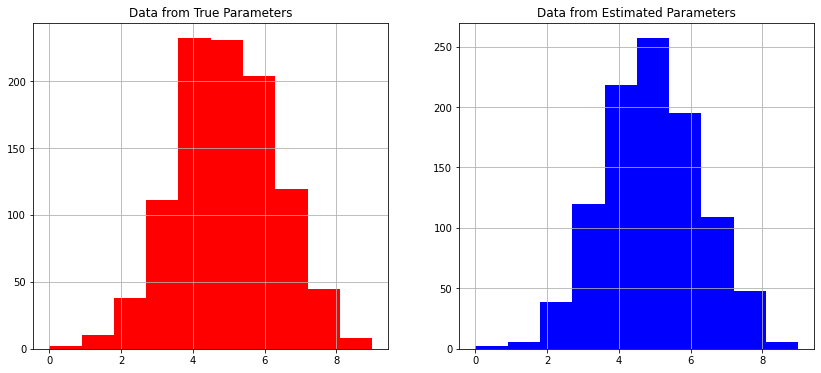

In [3]:
Bino = MLE()

Bino.fit(500,"Binomial",[10,0.5])
Bino.PlotData()
print()
print("--------------------")
print()
Bino.fit(1000,"Binomial",[10,0.5])
Bino.PlotData()

### Poisson Distribution

N: 500   True-Parameters: (0.6,)    Estimated-Parameters: (0.618,)


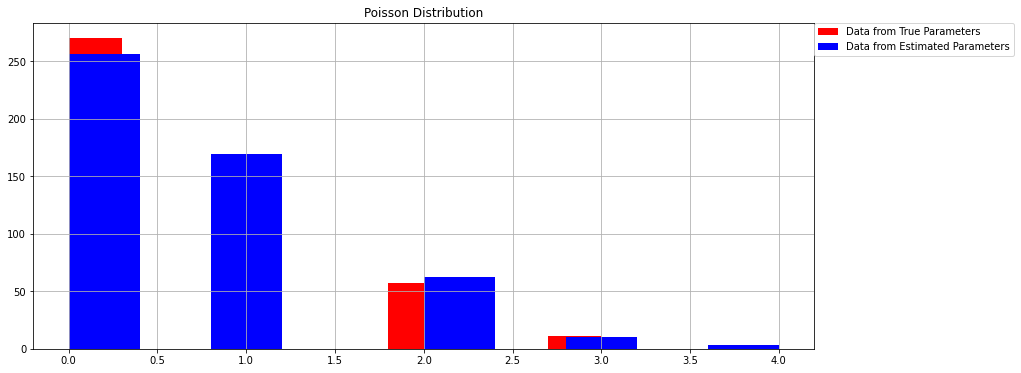

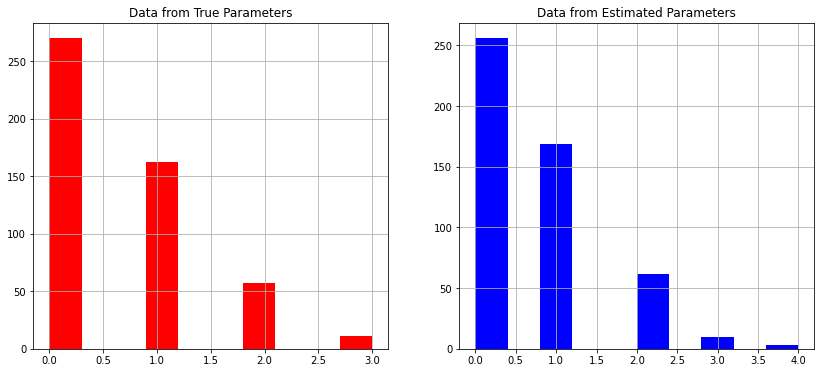


--------------------

N: 1000  True-Parameters: (0.6,)    Estimated-Parameters: (0.59,)


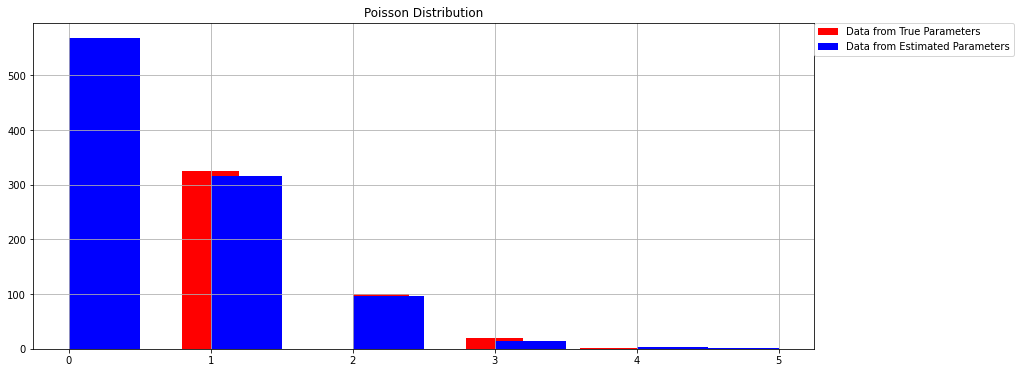

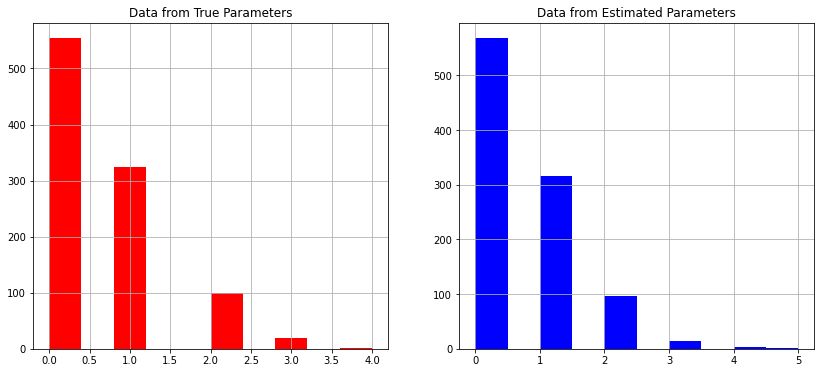

In [4]:
Pois = MLE()

Pois.fit(500,"Poisson",[0.6])
Pois.PlotData()
print()
print("--------------------")
print()
Pois.fit(1000,"Poisson",[0.6])
Pois.PlotData()

### Exponential Distribution

N: 500   True-Parameters: (0.6,)    Estimated-Parameters: (0.5840501233159591,)


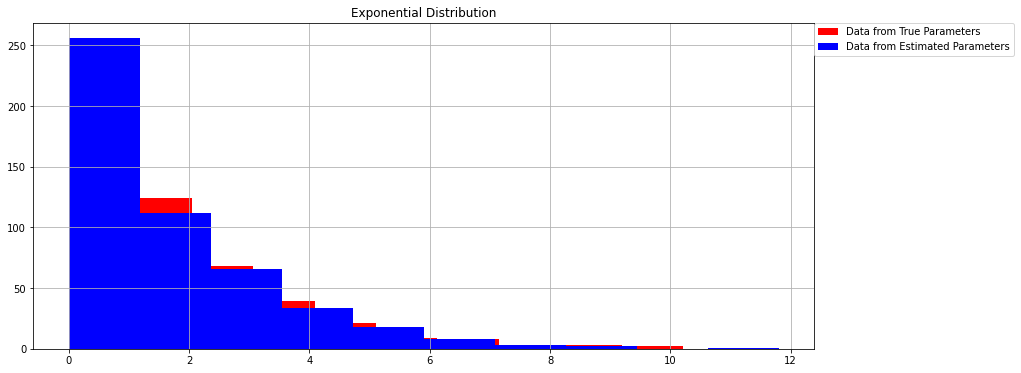

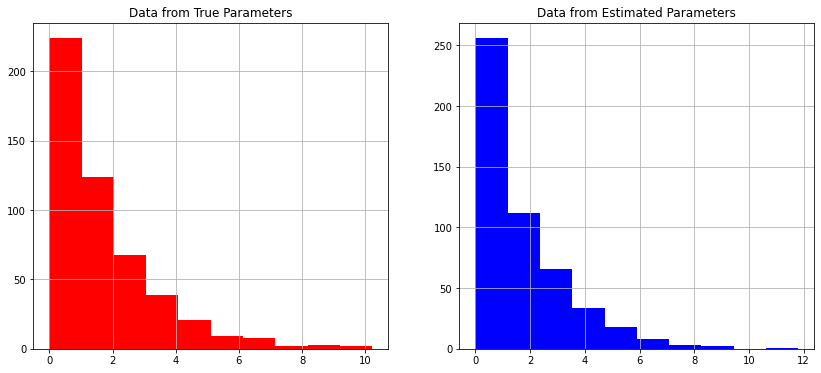


--------------------

N: 1000  True-Parameters: (0.6,)    Estimated-Parameters: (0.5950541362451353,)


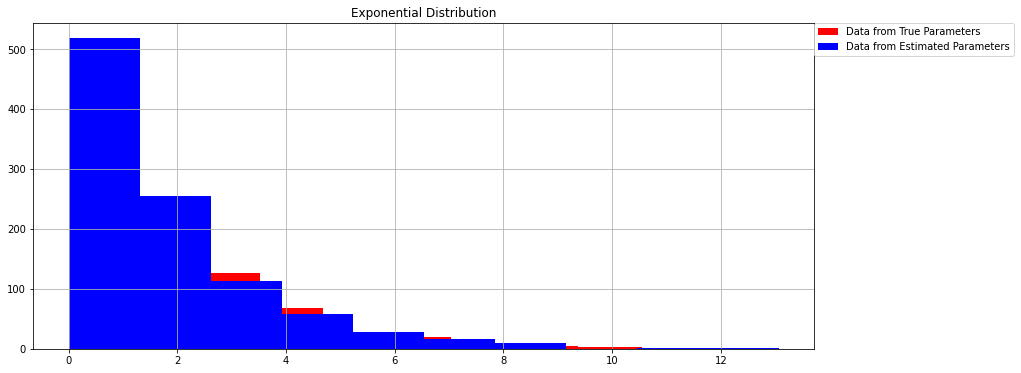

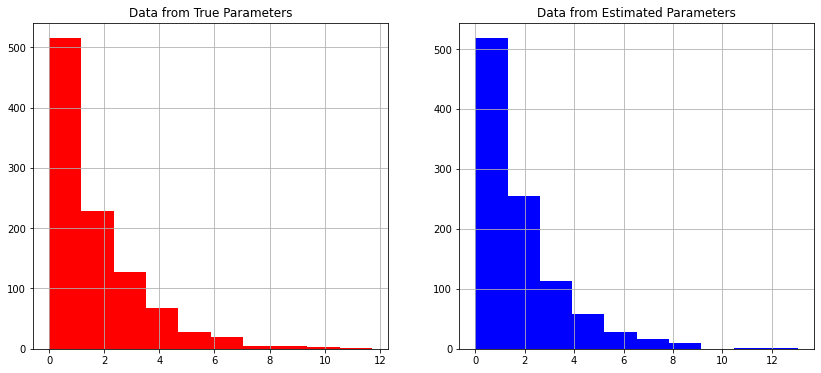

In [5]:
Expo = MLE()

Expo.fit(500,"Exponential",[0.6])
Expo.PlotData()
print()
print("--------------------")
print()
Expo.fit(1000,"Exponential",[0.6])
Expo.PlotData()

### Gaussian Distribution

N: 500   True-Parameters: (0.6, 3)  Estimated-Parameters: (0.6873527749565351, 3.16562065895414)


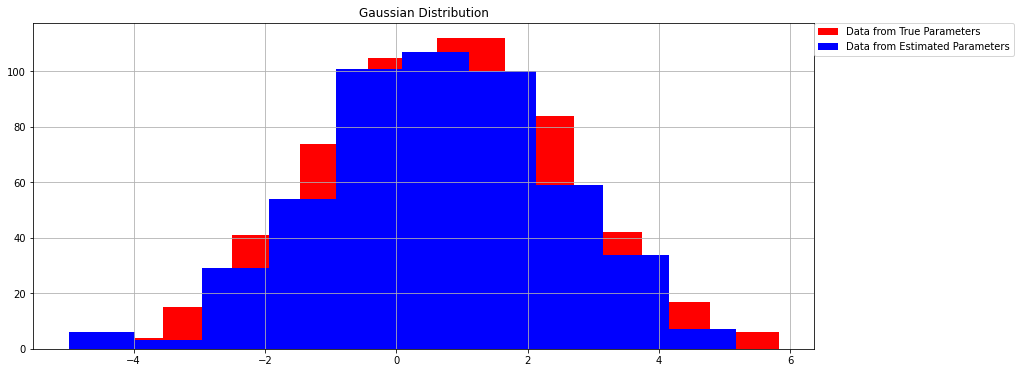

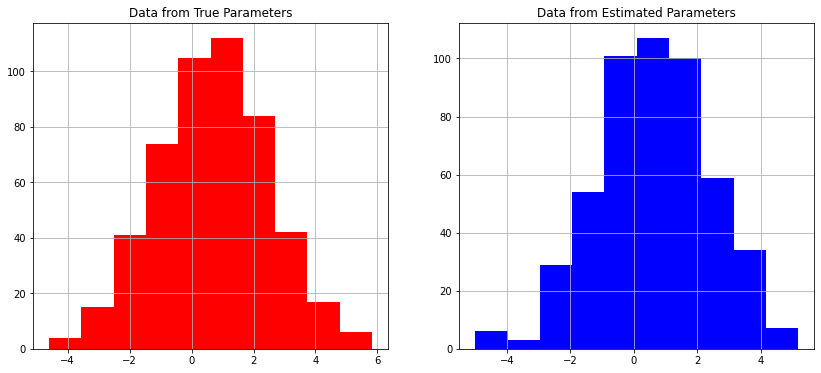


--------------------

N: 1000  True-Parameters: (0.6, 3)  Estimated-Parameters: (0.6235942324270274, 3.1869979973139317)


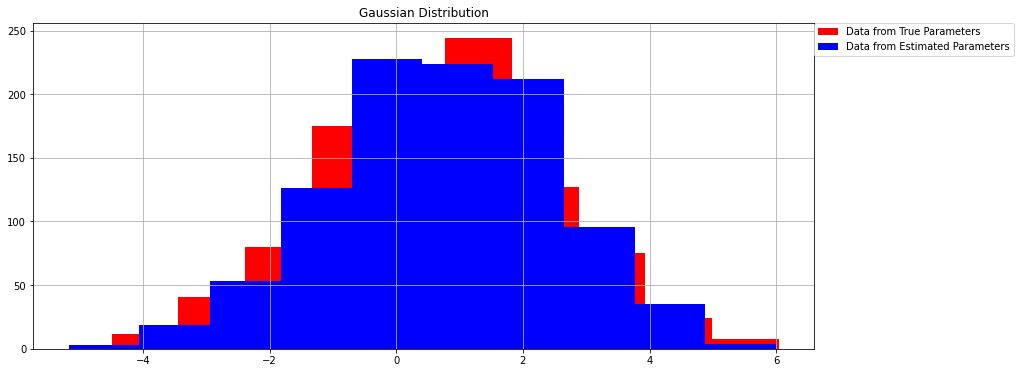

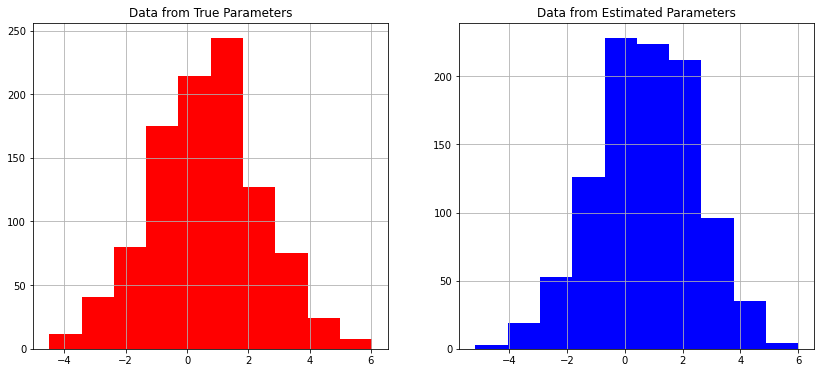

In [6]:
Gaus = MLE()

Gaus.fit(500,"Gaussian",[0.6,3])
Gaus.PlotData()
print()
print("--------------------")
print()
Gaus.fit(1000,"Gaussian",[0.6,3])
Gaus.PlotData()

### Laplacian Distribution

N: 500   True-Parameters: (0.6, 3)  Estimated-Parameters: (0.6847944987235461, 2.807294507093549)


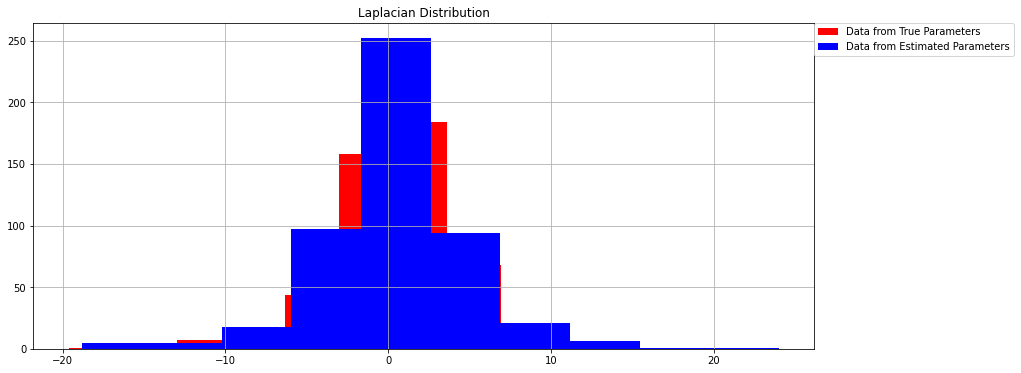

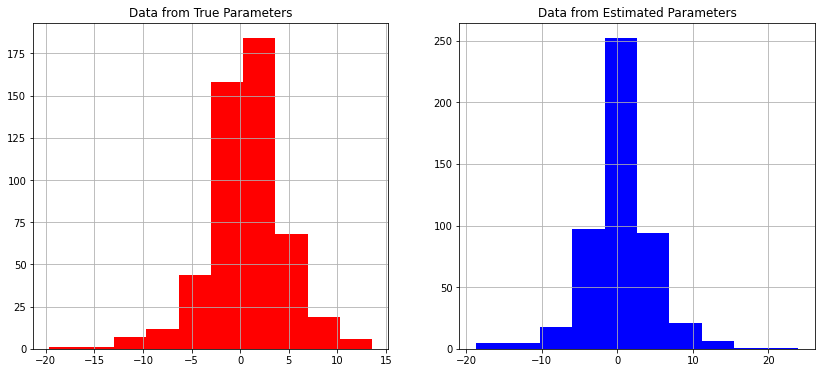


--------------------

N: 1000  True-Parameters: (0.6, 3)  Estimated-Parameters: (0.6219362162545532, 3.150859234809337)


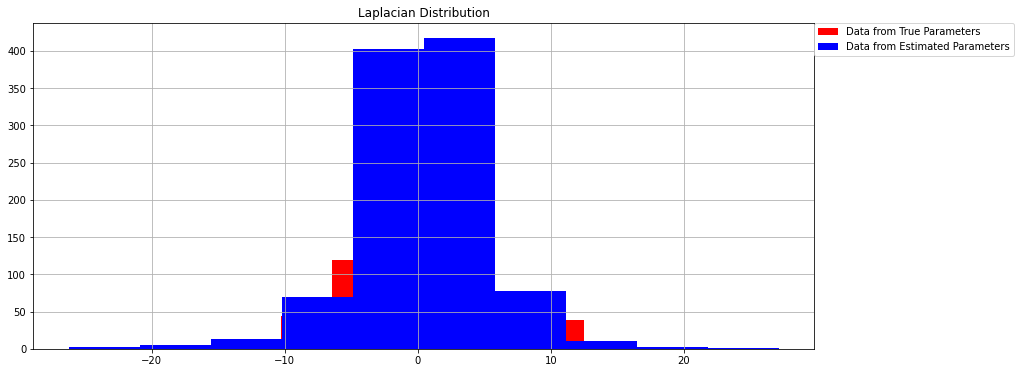

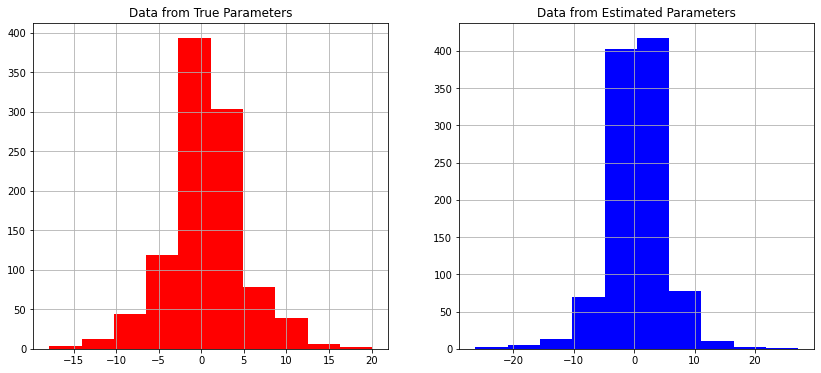

In [7]:
Lapl = MLE()

Lapl.fit(500,"Laplacian",[0.6,3])
Lapl.PlotData()
print()
print("--------------------")
print()
Lapl.fit(1000,"Laplacian",[0.6,3])
Lapl.PlotData()

As N increases Estimated Parameters converge to True Parameters